In [2]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True
sns.set()

In [12]:
# parentDir=os.path.join("Metrics", "noHeadMoreCSBW")
parentDir=os.path.join("Metrics", "sleep")

In [13]:
df = pd.read_csv(os.path.join(parentDir, 'collectedMetrics.csv'))
df = df.groupby(["nCPUs", "expN"], as_index=False).mean()

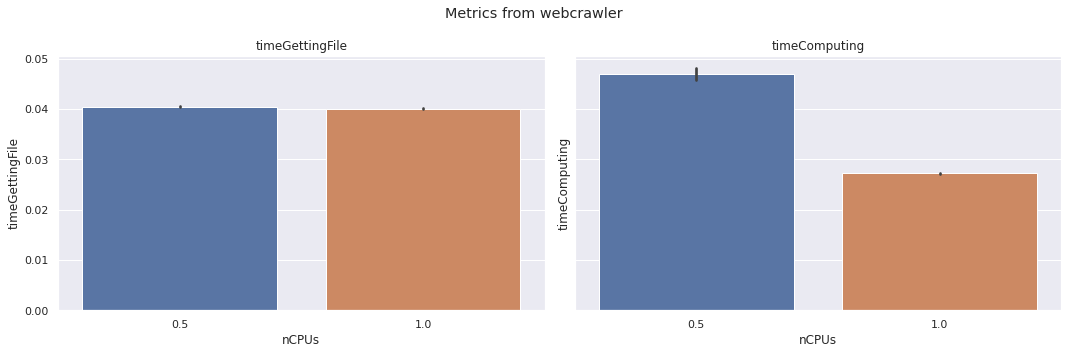

In [14]:
interestedCollumns = ["timeGettingFile", "timeComputing"]
fig, axes = plt.subplots(1, len(interestedCollumns), figsize=(15,5), sharey=True)
fig.suptitle('Metrics from webcrawler')

for i, collumnTitle in enumerate(interestedCollumns):
    sns.barplot(ax=axes[i], x="nCPUs", y=collumnTitle, data=df)
    axes[i].set_title(collumnTitle)

Text(0, 0.5, 'Time Getting File %')

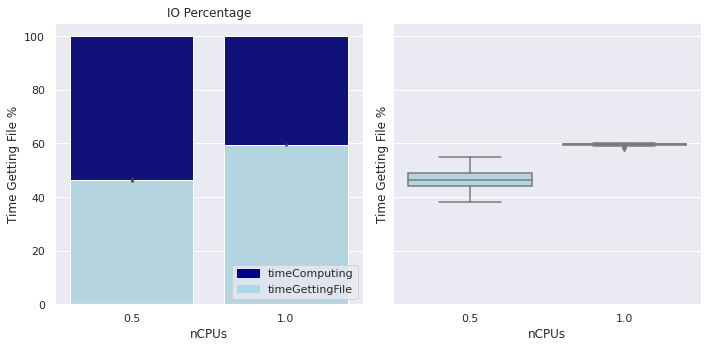

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)

# from raw value to percentage
percentDF = pd.DataFrame()
percentDF = df[['nCPUs', 'timeGettingFile', 'timeComputing']].copy()
percentDF["totalTime"] = df["timeGettingFile"] + df["timeComputing"]
percentDF["timeGettingFilePercent"] = df["timeGettingFile"] / percentDF["totalTime"] * 100
percentDF["total"] = 100

ax=axes[0]
bar1 = sns.barplot(x="nCPUs", y="total", data=percentDF, color='darkblue', ax=ax)
bar2 = sns.barplot(x="nCPUs", y="timeGettingFilePercent", data=percentDF, color='lightblue', ax=ax)

ax.set_title('IO Percentage')
ax.set_ylabel('Time Getting File %')
# add legend
top_bar = mpatches.Patch(color='darkblue', label='timeComputing')
bottom_bar = mpatches.Patch(color='lightblue', label='timeGettingFile')
ax.legend(handles=[top_bar, bottom_bar], loc="lower right")

ax=axes[1]
sns.boxplot(ax=ax, x="nCPUs", y="timeGettingFilePercent", color='lightblue', data=percentDF)
ax.set_ylabel('Time Getting File %')

In [16]:
percentDF.groupby(["nCPUs"]).mean()

,timeGettingFile,timeComputing,totalTime,timeGettingFilePercent,total
nCPUs,,,,,
0.5,0.040480,0.047047,0.087527,46.492340,100.0
1.0,0.040085,0.027194,0.067280,59.581568,100.0


In [17]:
totalExDF = pd.read_csv(os.path.join(parentDir, 'execTime.csv'))
totalExDF = totalExDF.groupby(["nCPUs", "expN"], as_index=False).mean()

<AxesSubplot:xlabel='expN', ylabel='Execution Time'>

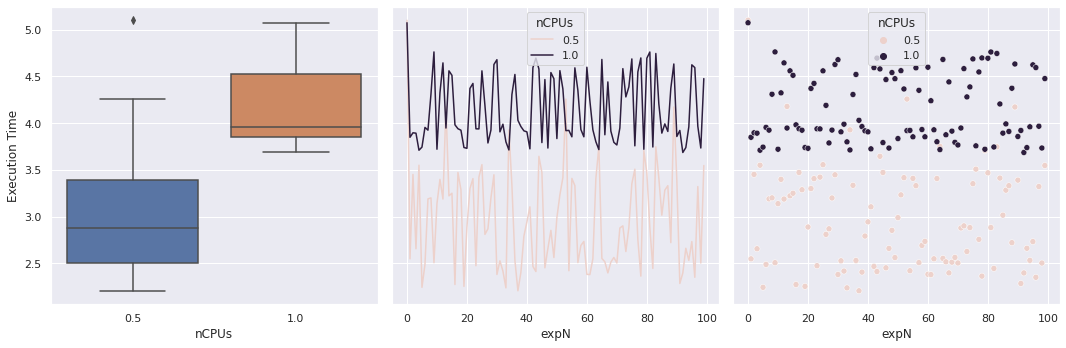

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
ax=axes[0]
# ax.set_ylim(ymin=0)
sns.boxplot(x="nCPUs", y="Execution Time", data=totalExDF, ax=ax)
ax=axes[1]
sns.lineplot(x="expN", y="Execution Time", hue="nCPUs", data=totalExDF, ax=ax)
ax=axes[2]
sns.scatterplot(x="expN", y="Execution Time", hue="nCPUs", data=totalExDF, ax=ax)


<AxesSubplot:xlabel='nCPUs', ylabel='Execution Time'>

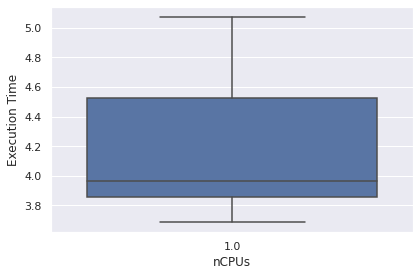

In [19]:
totalExDFFiltered = totalExDF.loc[totalExDF['nCPUs'] != 0.5]
sns.boxplot(x="nCPUs", y="Execution Time", data=totalExDFFiltered)

In [20]:
totalExDF.groupby(["nCPUs"]).mean()

,expN,Execution Time
nCPUs,,
0.5,49.5,2.970680
1.0,49.5,4.153099


   nNodes  executionTime  normalizedCost  ExecutionSpeedup
0       2          23.34           1.000             1.000
1       3          18.98           1.220             1.230
2       4          18.99           1.627             1.229


<AxesSubplot:xlabel='normalizedCost', ylabel='ExecutionSpeedup'>

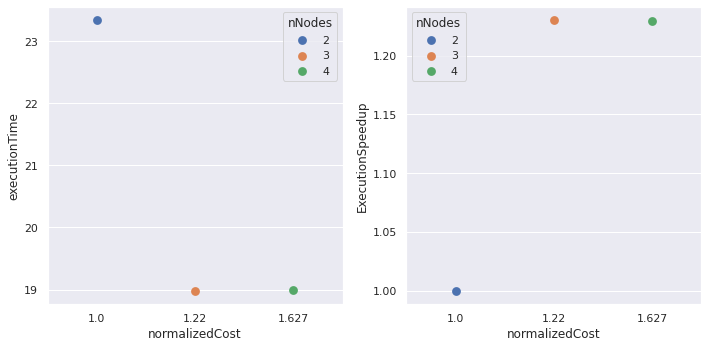

In [6]:
data = [[1, 15.163],
        [2, 8.97],
        [3, 7.07]]

df = pd.DataFrame(data, columns=["nNodes", "executionTime"])

fig, axes = plt.subplots(1, 2, figsize=(10,5))
df["normalizedCost"] = df["nNodes"]*df["executionTime"]
oneInstCost = df.loc[df['nNodes'] == 2]["normalizedCost"].values[0]
df["normalizedCost"] = df["normalizedCost"]/oneInstCost

oneInstExec = df.loc[df['nNodes'] == 2]["executionTime"].values[0]
df["ExecutionSpeedup"] = oneInstExec/df["executionTime"]
df = df.round(3)
print(df)


ax=axes[0]
sns.pointplot(x="normalizedCost", y="executionTime", hue="nNodes", data=df, ax=ax)
ax=axes[1]
sns.pointplot(x="normalizedCost", y="ExecutionSpeedup", hue="nNodes", data=df, ax=ax)

In [ ]:
# 95ms overhead for task communication
# ~3min worker instantiation time

# 2 cpus
# Best configuration found = -23.340000000000003
# Configuration with 1vcpu = -30.25
# Best configuration found = -23.34
# Best resource map found = {'__main__.processURL': 0.5}
# Improvement over 1vcpu = 6.91s - Speedup 1.3%

# 3 cpus 
# Best configuration found = -18.98333333333333
# Configuration with 1vcpu = -22.54
# Best configuration found = -18.98
# Best resource map found = {'__main__.processURL': 0.5}
# Improvement over 1vcpu = 3.56s - Speedup 1.19%

# 4 cpus
# Best configuration found = -18.993333333333336
# Configuration with 1vcpu = -19.2
# Best configuration found = -18.99
# Best resource map found = {'__main__.processURL': 0.5}
# Improvement over 1vcpu = 0.2s - Speedup 1.01%

# try to submit job instead of running it on my machine?

<AxesSubplot:xlabel='nNodes', ylabel='Efficiency'>

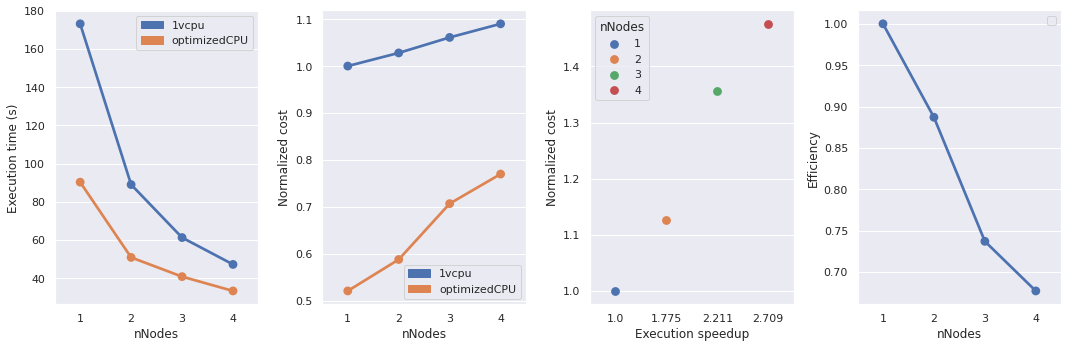

In [91]:
# Best configuration found = -33.32333333333333
# Configuration with 1vcpu = -47.2
# Best configuration found = -33.32
# Best resource map found = {'__main__.processURL': 0.5}
# Improvement over 1vcpu = 13.87s - Speedup 1.42%

# Best configuration found = -40.82333333333333
# Configuration with 1vcpu = -61.26
# Best configuration found = -40.82
# Best resource map found = {'__main__.processURL': 0.5}
# Improvement over 1vcpu = 20.44s - Speedup 1.5%

# Best configuration found = -50.873333333333335
# Configuration with 1vcpu = -89.0
# Best configuration found = -50.87
# Best resource map found = {'__main__.processURL': 0.5}
# Improvement over 1vcpu = 38.13s - Speedup 1.75%

# Best configuration found = -90.27
# Configuration with 1vcpu = -173.16
# Best configuration found = -90.27
# Best resource map found = {'__main__.processURL': 0.5}
# Improvement over 1vcpu = 82.89s - Speedup 1.92%

data = [[1, 173.16, 90.27],
        [2, 89.0, 50.87],
        [3, 61.26, 40.82],
        [4, 47.2, 33.32]]

df = pd.DataFrame(data, columns=["nNodes", "defaultExecutionTime", "optimizedExecutionTime"])

minInstanceCount = data[0][0]
fig, axes = plt.subplots(1, 4, figsize=(15,5))
df["optimizedNormalizedCost"] = df["nNodes"]*df["optimizedExecutionTime"]
df["defaultNormalizedCost"] = df["nNodes"]*df["defaultExecutionTime"]
optimizedOneInstCost = df.loc[df['nNodes'] == minInstanceCount]["optimizedNormalizedCost"].values[0]
defaultOneInstCost = df.loc[df['nNodes'] == minInstanceCount]["defaultNormalizedCost"].values[0]
df["optimizedNormalizedCostLocal"] = df["optimizedNormalizedCost"]/optimizedOneInstCost
df["optimizedNormalizedCost"] = df["optimizedNormalizedCost"]/defaultOneInstCost
df["defaultNormalizedCost"] = df["defaultNormalizedCost"]/defaultOneInstCost


df["IntraExecutionSpeedup"] = df["defaultExecutionTime"]/df["optimizedExecutionTime"]
oneInstTime = df.loc[df['nNodes'] == minInstanceCount]["optimizedExecutionTime"].values[0]
df["ExecutionSpeedup"] = oneInstTime/df["optimizedExecutionTime"]
df["CostSaved"] = df["defaultNormalizedCost"]-df["optimizedNormalizedCost"]

df["Efficiency"] = df["ExecutionSpeedup"]/df["nNodes"]

df = df.round(3)

pal = sns.color_palette()
blueColor = pal[0]
redColor = pal[1]
blue_patch = mpatches.Patch(color=blueColor, label='1vcpu')
red_patch = mpatches.Patch(color=redColor, label='optimizedCPU')

ax=axes[0]
sns.pointplot(x="nNodes", y="defaultExecutionTime", data=df, ax=ax, color=blueColor, label="1vcpu")
sns.pointplot(x="nNodes", y="optimizedExecutionTime", data=df, ax=ax, color=redColor, label="optimizedCPU")
plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3'])
ax.set_ylabel('Execution time (s)')
ax.legend(handles=[blue_patch, red_patch])

ax=axes[1]
sns.pointplot(x="nNodes", y="defaultNormalizedCost", data=df, ax=ax, color=blueColor, label="1vcpu")
sns.pointplot(x="nNodes", y="optimizedNormalizedCost", data=df, ax=ax, color=redColor, label="optimizedCPU")
ax.set_ylabel('Normalized cost')
ax.legend(handles=[blue_patch, red_patch], loc="lower right")
ax=axes[2]
sns.pointplot(x="ExecutionSpeedup", y="optimizedNormalizedCostLocal", hue="nNodes", data=df, ax=ax)
ax.set_xlabel('Execution speedup')
ax.set_ylabel('Normalized cost')
ax=axes[3]
sns.pointplot(x="nNodes", y="Efficiency", data=df, ax=ax)

# print(df)
